### Import

In [1]:
import numpy as np
import pandas as pd
import mlxtend
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
file = pd.read_excel('cancer_.xlsx')
data = file.to_numpy()
inputs = data[:, :9] #features
outputs = data[:, 9] #target

### Finding the size of each class

In [3]:
print('Size of class 0:', len(outputs[outputs == 0]))
print('Size of class 1:', len(outputs[outputs == 1]))
print('Size of the dataset:', len(outputs))

Size of class 0: 241
Size of class 1: 457
Size of the dataset: 698


### Shuffle

In [4]:
per_list = np.random.permutation(len(data))
inputs_sh = []
outputs_sh = []
for i in range(len(data)):
    per_idx = per_list[i]
    tmp_input = inputs[per_idx]
    tmp_output = outputs[per_idx]
    inputs_sh.append(tmp_input)
    outputs_sh.append(tmp_output)
inputs_sh = np.array(inputs_sh)
outputs_sh = np.array(outputs_sh)

### Normalize data

In [5]:
min_vec = inputs_sh.min(axis = 0)
max_vec = inputs_sh.max(axis=0)
inputs_sh = (inputs_sh - min_vec) / (max_vec - min_vec)

### Splitting data

In [6]:
trn_test_split = int(0.75 * len(inputs_sh))
X_train = inputs_sh[0:trn_test_split , : ]
Y_train = outputs_sh[0:trn_test_split]

X_val = inputs_sh[trn_test_split : , :]
Y_val = outputs_sh[trn_test_split : ,]

### Logistic regression classification

In [7]:
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression from sklearn

logreg = LogisticRegression(penalty=None, max_iter=10000)  # Instantiating logistic regression

logreg.fit(X_train, Y_train)  # Fitting the train data to 'logreg'

LogisticRegression(max_iter=10000, penalty=None)

In [8]:
# Predicted class for the val subset through logistic regression

y_train_pred_prob = logreg.predict_proba(X_train)  # Calculating probabilities of the two classes in train subset
y_val_pred_prob = logreg.predict_proba(X_val)  # Calculating probabilities of the two classes in val subset

# Presenting the probabilities for the 1st 10 instances in train subset

print('Train predictions for probabilities:\n\n', y_train_pred_prob[:10], '\n')

Train predictions for probabilities:

 [[1.56703148e-02 9.84329685e-01]
 [9.99994564e-01 5.43593231e-06]
 [9.94616914e-01 5.38308605e-03]
 [1.74575966e-03 9.98254240e-01]
 [1.63906145e-03 9.98360939e-01]
 [1.05249050e-02 9.89475095e-01]
 [9.18388506e-03 9.90816115e-01]
 [2.53735361e-02 9.74626464e-01]
 [5.93897651e-03 9.94061023e-01]
 [6.69924101e-03 9.93300759e-01]] 



In [9]:
# Presenting the probabilities for the 1st 10 instances in val subset

print('Validation predictions for probabilities:\n\n', y_val_pred_prob[:10])

Validation predictions for probabilities:

 [[9.99648452e-01 3.51548334e-04]
 [9.27342446e-01 7.26575545e-02]
 [4.60713134e-03 9.95392869e-01]
 [8.90131850e-01 1.09868150e-01]
 [6.80943513e-03 9.93190565e-01]
 [1.73153297e-03 9.98268467e-01]
 [9.97455651e-01 2.54434937e-03]
 [2.12557910e-02 9.78744209e-01]
 [9.92553583e-01 7.44641707e-03]
 [1.48573431e-02 9.85142657e-01]]


In [10]:
y_train_pred = y_train_pred_prob.argmax(axis=1)  # Finding the predicted class for train predictions
y_val_pred = y_val_pred_prob.argmax(axis=1)  # Finding the predicted class for val predictions

# Presenting the predicted classes for the 1st 10 instances of train

print('Predicted class for train: ', y_train_pred[:10], '\n')

# Presenting the predicted classes for the 1st 10 instances of validation

print('Predicted class for validation: ', y_val_pred[:10])

Predicted class for train:  [1 0 0 1 1 1 1 1 1 1] 

Predicted class for validation:  [0 0 1 0 1 1 0 1 0 1]


In [11]:
# Calculating the train and validation accuracy scores of the model

from sklearn import metrics  # Importing 'metrics' from sklearn

train_score = metrics.accuracy_score(Y_train, y_train_pred)  # train accuracy

val_score = metrics.accuracy_score(Y_val, y_val_pred)  # Validation accuracy

print('Train accuracy score of the model is ', round(train_score, 5), '\n')
print('Validation accuracy score of the model is ', round(val_score, 5))

Train accuracy score of the model is  0.97323 

Validation accuracy score of the model is  0.95429


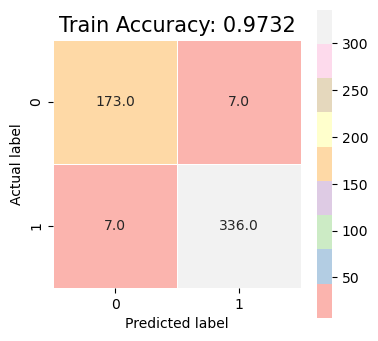

In [12]:
# Computing the confusion matrix for the train subset

from sklearn.metrics import confusion_matrix, classification_report

train_c_matrix = confusion_matrix(Y_train, y_train_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4, 4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Pastel1');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size=15)
plt.show()

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       180
         1.0       0.98      0.98      0.98       343

    accuracy                           0.97       523
   macro avg       0.97      0.97      0.97       523
weighted avg       0.97      0.97      0.97       523



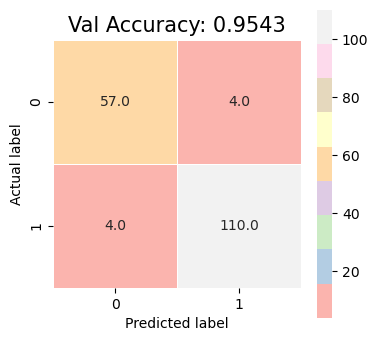

In [13]:
# Print the train classification report

print('Classification Report for the Train Subset: \n\n', classification_report(Y_train, y_train_pred))
# Computing the confusion matrix for the val subset

val_c_matrix = confusion_matrix(Y_val, y_val_pred)  # Compute the validation confusion matrix

plt.figure(figsize=(4, 4))
sns.heatmap(val_c_matrix, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Pastel1');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Val Accuracy: {0}'.format(round(val_score, 4))
plt.title(all_sample_title, size=15)
plt.show()

Classification Report for the Validation Subset: 

               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        61
         1.0       0.96      0.96      0.96       114

    accuracy                           0.95       175
   macro avg       0.95      0.95      0.95       175
weighted avg       0.95      0.95      0.95       175



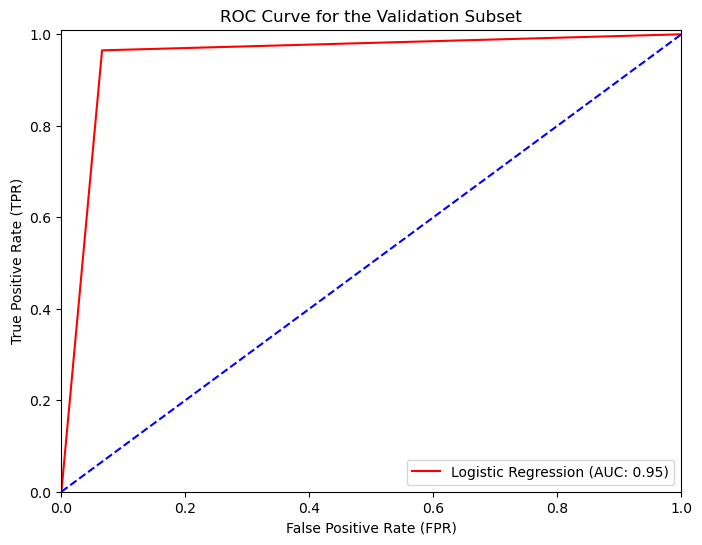

In [14]:
# Print the train classification report

print('Classification Report for the Validation Subset: \n\n', classification_report(Y_val, y_val_pred))
# Plotting the ROC curve for the val subset

from sklearn.metrics import roc_curve, auc  # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(y_val_pred, Y_val)  # Computing ROC for the val subset
auc(fpr, tpr)  # Computing AUC for the val subset

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='Logistic Regression (AUC: %.2f)'
                                      % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Validation Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

From the results obtained by Logitic Regression classifier, it can be observed that 96% accuracy is reached for validation dataset while there is no overfitting can be observed.

### LDA classification

In [15]:
# Loading 'LinearDiscriminantAnalysis' from 'discriminant_analysis' module

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()  # Instantiating the lda classifier
lda_clf.fit(X_train, Y_train)  # Fitting the train data

LinearDiscriminantAnalysis()

In [16]:
# Finding the predictions of the lda classifier for train and val subsets

train_y_pred = lda_clf.predict(X_train)
val_y_pred = lda_clf.predict(X_val)

In [17]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(Y_train, train_y_pred)  # Compute train accuracy
val_score = metrics.accuracy_score(Y_val, val_y_pred)  # Compute val accuracy
train_report = classification_report(Y_train, train_y_pred)  # Generate classification report for train data
val_report = classification_report(Y_val, val_y_pred)  # Generate classification report for val data

print('LDA Train Classification Report: \n\n', train_report, '\n\n')
print('LDA Validation Classification Report: \n\n', val_report)

LDA Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       180
         1.0       0.97      0.98      0.97       343

    accuracy                           0.96       523
   macro avg       0.96      0.96      0.96       523
weighted avg       0.96      0.96      0.96       523
 


LDA Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        61
         1.0       0.96      0.97      0.97       114

    accuracy                           0.95       175
   macro avg       0.95      0.95      0.95       175
weighted avg       0.95      0.95      0.95       175



From the results obtained by LDA classifier, it can be seen that F1 score and accuracy in train and validation dataset is decreased slightly regarding the results obtained by Logisitic Regression classifier, while there is no overfitting can be observed.

### SVM classification

In [18]:
from sklearn import svm  # Importing 'svm' module from 'sklearn'

# Instantiating the SVM classifier with linear kernel
# We have allocated a small budget for (C=0.01) for margin violations

linear_svc = svm.SVC(kernel='linear', gamma='auto', C=0.01)

linear_svc.fit(X_train, Y_train)  # Fitting the training data to the classifier
y_pred = linear_svc.predict(X_val)  # Calculate the predictions of the model for the validation subset

In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(Y_train, train_y_pred)  # Compute train accuracy
val_score = metrics.accuracy_score(Y_val, val_y_pred)  # Compute val accuracy
train_report = classification_report(Y_train, train_y_pred)  # Generate classification report for train data
val_report = classification_report(Y_val, val_y_pred)  # Generate classification report for val data

print('SVM Train Classification Report: \n\n', train_report, '\n\n')
print('SVM Validation Classification Report: \n\n', val_report)

SVM Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       180
         1.0       0.97      0.98      0.97       343

    accuracy                           0.96       523
   macro avg       0.96      0.96      0.96       523
weighted avg       0.96      0.96      0.96       523
 


SVM Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        61
         1.0       0.96      0.97      0.97       114

    accuracy                           0.95       175
   macro avg       0.95      0.95      0.95       175
weighted avg       0.95      0.95      0.95       175



### Tuning Hyperparameters for SVM Classifier

In [20]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm


def svm_clf(X_tr, X_ts, y_tr, y_ts, ker, C, gamma='auto', r=0, deg=1):
    clf = svm.SVC(kernel=ker, gamma=gamma, C=C, coef0=r, degree=deg)
    clf.fit(X_tr, y_tr)  # Fit the train data
    y_tr_pred = clf.predict(X_tr)  # Predict the target for train data
    y_ts_pred = clf.predict(X_ts)  # Predict the target for validation data
    tr_score = metrics.accuracy_score(y_tr, y_tr_pred)  # Compute train accuracy
    ts_score = metrics.accuracy_score(y_ts, y_ts_pred)  # Compute validation accuracy
    tr_report = classification_report(y_tr, y_tr_pred)  # Generate classification report for train data
    ts_report = classification_report(y_ts, y_ts_pred)  # Generate classification report for validation data
    print('Train Classification Report: \n\n', tr_report, '\n\n')
    print('Validation Classification Report: \n\n', ts_report)
    return

In [21]:
# Apply linear SVM with very low budget for margin violation

svm_clf(X_train, X_val, Y_train, Y_val, ker='linear', C=0.01)

Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.96      0.89      0.92       180
         1.0       0.94      0.98      0.96       343

    accuracy                           0.95       523
   macro avg       0.95      0.93      0.94       523
weighted avg       0.95      0.95      0.95       523
 


Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94        61
         1.0       0.96      0.98      0.97       114

    accuracy                           0.96       175
   macro avg       0.96      0.95      0.96       175
weighted avg       0.96      0.96      0.96       175



In [22]:
# Apply radial SVM with a relatively high budget for margin violation

svm_clf(X_train, X_val, Y_train, Y_val, ker='rbf', C=10)

Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       180
         1.0       0.98      0.98      0.98       343

    accuracy                           0.97       523
   macro avg       0.97      0.97      0.97       523
weighted avg       0.97      0.97      0.97       523
 


Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        61
         1.0       0.98      0.96      0.97       114

    accuracy                           0.96       175
   macro avg       0.95      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175



In [23]:
# Apply polynomial SVM (with degree 3 and r=1) with very low budget for margin violation

svm_clf(X_train, X_val, Y_train, Y_val, ker='poly', C=0.001, r=1, deg=3)

Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       180
         1.0       0.66      1.00      0.79       343

    accuracy                           0.66       523
   macro avg       0.33      0.50      0.40       523
weighted avg       0.43      0.66      0.52       523
 


Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        61
         1.0       0.65      1.00      0.79       114

    accuracy                           0.65       175
   macro avg       0.33      0.50      0.39       175
weighted avg       0.42      0.65      0.51       175



In [24]:
# Apply sigmoid SVM (with r=2) with a relatively high budget for margin violation

svm_clf(X_train, X_val, Y_train, Y_val, ker='sigmoid', C=10, r=2)

Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       180
         1.0       0.97      0.98      0.98       343

    accuracy                           0.97       523
   macro avg       0.96      0.96      0.96       523
weighted avg       0.97      0.97      0.97       523
 


Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        61
         1.0       0.99      0.96      0.98       114

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



In [25]:
# Importing 'GridSearchCV' from 'sklearn'

from sklearn.model_selection import GridSearchCV

# Specifying the hyperparameters 'C', 'gamma', and 'kernel'

param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'rbf']}

# Instantiating 'GridSearchCV'
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3, n_jobs=-1)

# Fitting the data
grid.fit(X_train, Y_train)

print('\n Best choices for hyperparameters:\n', grid.best_params_)  # Presenting best choice

grid_predictions = grid.predict(X_val)  # Compute the predictions of SVM with best choice of hyperparameters

print('\n Validation Classification Report:\n\n', classification_report(Y_val, grid_predictions))

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best choices for hyperparameters:
 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

 Validation Classification Report:

               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        61
         1.0       0.99      0.96      0.97       114

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175



In [26]:
# Importing 'GridSearchCV' from 'sklearn'

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm

param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [2],
              'coef0': [0, 1]}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3, n_jobs=-1)

grid.fit(X_train, Y_train)

print('\n Best choices for hyperparameters:\n', grid.best_params_)

grid_predictions = grid.predict(X_val)

print('\n Validation Classification Report:\n\n', classification_report(Y_val, grid_predictions))

Fitting 5 folds for each of 60 candidates, totalling 300 fits

 Best choices for hyperparameters:
 {'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

 Validation Classification Report:

               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        61
         1.0       0.99      0.96      0.97       114

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175



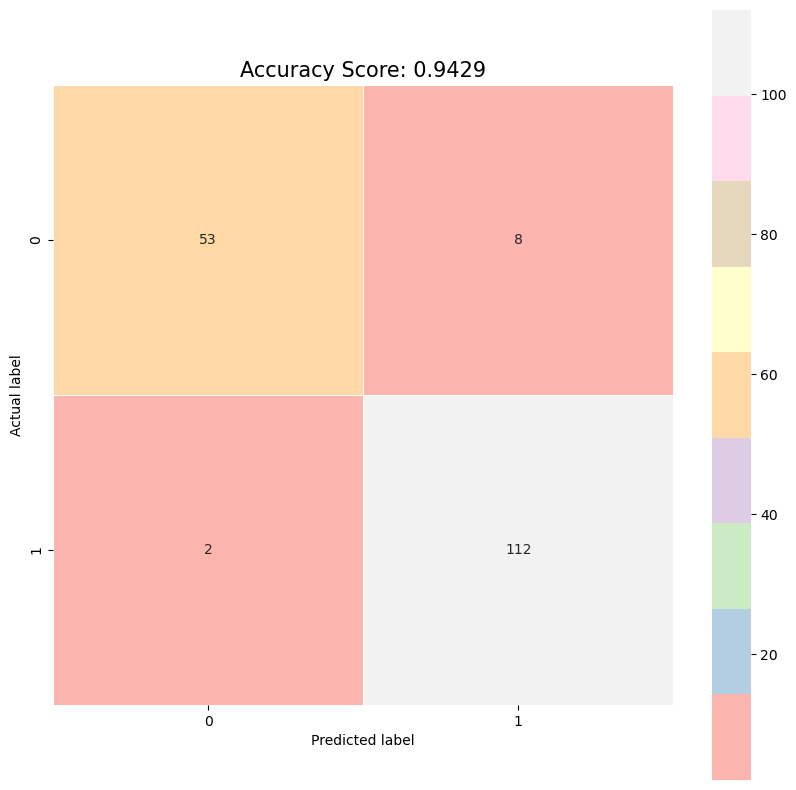

In [27]:
# Running the SVM with best choice of hyperparameters

optimal_clf = svm.SVC(kernel='poly', C=1, gamma='scale', degree=3, coef0=0)
optimal_clf.fit(X_train, Y_train)

y_pred = optimal_clf.predict(X_val)

svc_c_matrix = confusion_matrix(Y_val, y_pred)
score = metrics.accuracy_score(Y_val, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(svc_c_matrix, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score, 4))
plt.title(all_sample_title, size=15);
plt.show()

With respect to the results which are obtained by SVM classifier, it can be noticed that implementing GridSearchCV has an important impacts on SVM classifier regarding that the optimal option for kernel, C and gamma can be achieved. The SVM has better results compared to the Logistic Regression and LDA classifiers.

### QDA Classification

In [28]:
# Loading 'QuadraticDiscriminantAnalysis' from 'discriminant_analysis' module

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_clf = QuadraticDiscriminantAnalysis()  # Instantiating the QDA classifier
qda_clf.fit(X_train, Y_train)  # Fitting the training data

QuadraticDiscriminantAnalysis()

In [29]:
# Finding the predictions of the lda classifier for train and val subsets

train_y_pred = lda_clf.predict(X_train)
val_y_pred = lda_clf.predict(X_val)

In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(Y_train, train_y_pred)  # Compute train accuracy
val_score = metrics.accuracy_score(Y_val, val_y_pred)  # Compute val accuracy
train_report = classification_report(Y_train, train_y_pred)  # Generate classification report for train data
val_report = classification_report(Y_val, val_y_pred)  # Generate classification report for val data

print('LDA Train Classification Report: \n\n', train_report, '\n\n')
print('LDA Validation Classification Report: \n\n', val_report)

LDA Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       180
         1.0       0.97      0.98      0.97       343

    accuracy                           0.96       523
   macro avg       0.96      0.96      0.96       523
weighted avg       0.96      0.96      0.96       523
 


LDA Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        61
         1.0       0.96      0.97      0.97       114

    accuracy                           0.95       175
   macro avg       0.95      0.95      0.95       175
weighted avg       0.95      0.95      0.95       175



The results obtained by QDA classifier is similar to LDA classifier which are expcted regarding that LDA is used when a linear boundary is required between classifier and QDA is used to find a non-linear one. In this regard, both of these classifiers work better when the response classes are separable and the distribution for all classes is normal. By comparing the result obtained by LDA and QDA, it can be seen that the performance of QDA is much more accurate than LDA that is why QDA provides a more powerful classifier that can capture non-linear boundaries in the feature space. Thus, it is also less constrained, so requires more careful analysis to ensure do not overfit the model.

### Gaussian naive Bayes classification

In [31]:
# Importing 'GaussianNB' from naive_bayes module

from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()  # Instantiating the gaussian naive Bayes classifier
gnb_clf.fit(X_train, Y_train)  # Fitting the training data

GaussianNB()

In [32]:
# Finding the predictions of the model for the train and validation subsets

train_y_pred = gnb_clf.predict(X_train)
val_y_pred = gnb_clf.predict(X_val)

In [33]:
# Computing various classification evaluation metrics and presenting the classification report

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(Y_train, train_y_pred)  # Compute train accuracy
val_score = metrics.accuracy_score(Y_val, val_y_pred)  # Compute validation accuracy
train_report = classification_report(Y_train, train_y_pred)  # Generate classification report for train data
val_report = classification_report(Y_val, val_y_pred)  # Generate classification report for validation data

print('Gaussian NB Train Classification Report: \n\n', train_report, '\n\n')
print('Gaussian NB Validation Classification Report: \n\n', val_report)

Gaussian NB Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       180
         1.0       0.98      0.95      0.97       343

    accuracy                           0.96       523
   macro avg       0.95      0.96      0.96       523
weighted avg       0.96      0.96      0.96       523
 


Gaussian NB Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        61
         1.0       0.99      0.95      0.97       114

    accuracy                           0.96       175
   macro avg       0.95      0.97      0.96       175
weighted avg       0.96      0.96      0.96       175



### Gradient boosting classification

In [34]:
# Importing 'GradientBoostingClassifier'

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()  # Instantiating GradientBoostingClassifier
gb_clf.fit(X_train, Y_train)  # Fitting the train data

GradientBoostingClassifier()

In [35]:
# Finding the predictions of GradientBoostingClassifier for train and validation subsets

train_y_pred = gb_clf.predict(X_train)
val_y_pred = gb_clf.predict(X_val)

In [36]:
train_score = metrics.accuracy_score(Y_train, train_y_pred)  # Compute train accuracy
val_score = metrics.accuracy_score(Y_val, val_y_pred)  # Compute val accuracy
train_report = classification_report(Y_train, train_y_pred)  # Generate classification report for train data
val_report = classification_report(Y_val, val_y_pred)  # Generate classification report for val data

print('GradientBoostingClassifier Train Classification Report: \n\n', train_report, '\n\n')
print('GradientBoostingClassifier Validation Classification Report: \n\n', val_report)

GradientBoostingClassifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       180
         1.0       1.00      1.00      1.00       343

    accuracy                           1.00       523
   macro avg       1.00      1.00      1.00       523
weighted avg       1.00      1.00      1.00       523
 


GradientBoostingClassifier Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.90      0.93      0.92        61
         1.0       0.96      0.95      0.96       114

    accuracy                           0.94       175
   macro avg       0.93      0.94      0.94       175
weighted avg       0.94      0.94      0.94       175



In [37]:
# Importing 'xgboost'

import xgboost as xgb

In [38]:
# Instantiate 'XGBClassifier'
xgb_clf = xgb.XGBClassifier(n_estimators=10000, max_depth=8, eta=0.04, subsample=0.8)

xgb_clf.fit(X_train, Y_train)  # Fitting the train data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.04, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=10000, n_jobs=None, num_parallel_tree=None, ...)

In [39]:
# Finding the predictions of GradientBoostingClassifier for train and validation subsets

train_y_pred = gb_clf.predict(X_train)
val_y_pred = gb_clf.predict(X_val)

train_score = metrics.accuracy_score(Y_train, train_y_pred)  # Compute train accuracy
val_score = metrics.accuracy_score(Y_val, val_y_pred)  # Compute validation accuracy
train_report = classification_report(Y_train, train_y_pred)  # Generate classification report for train data
val_report = classification_report(Y_val, val_y_pred)  # Generate classification report for validation data

print('GradientBoostingClassifier Train Classification Report: \n\n', train_report, '\n\n')
print('GradientBoostingClassifier Validation Classification Report: \n\n', val_report)

GradientBoostingClassifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       180
         1.0       1.00      1.00      1.00       343

    accuracy                           1.00       523
   macro avg       1.00      1.00      1.00       523
weighted avg       1.00      1.00      1.00       523
 


GradientBoostingClassifier Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.90      0.93      0.92        61
         1.0       0.96      0.95      0.96       114

    accuracy                           0.94       175
   macro avg       0.93      0.94      0.94       175
weighted avg       0.94      0.94      0.94       175



### Random forest classification

In [40]:
# Constructing a random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=3000, max_depth=8, max_leaf_nodes=20, random_state=3)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, max_leaf_nodes=20, n_estimators=3000,
                       random_state=3)

In [41]:
# Finding the predictions of random forest classifier for train and test subsets

train_y_pred = rf_clf.predict(X_train)
val_y_pred = rf_clf.predict(X_val)

In [42]:
train_score = metrics.accuracy_score(Y_train, train_y_pred)  # Compute train accuracy
val_score = metrics.accuracy_score(Y_val, val_y_pred)  # Compute validation accuracy
train_report = classification_report(Y_train, train_y_pred)  # Generate classification report for train data
val_report = classification_report(Y_val, val_y_pred)  # Generate classification report for validation data

print('Random Forest Classifier Train Classification Report: \n\n', train_report, '\n\n')
print('Random Forest Classifier Validation Classification Report: \n\n', val_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       180
         1.0       1.00      0.99      0.99       343

    accuracy                           0.99       523
   macro avg       0.99      0.99      0.99       523
weighted avg       0.99      0.99      0.99       523
 


Random Forest Classifier Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        61
         1.0       0.99      0.96      0.97       114

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175



Random Forests combine results at the end of the process by averaging or majority rules while gradient boosting combines results along the way. Random Forests and Gradient Boosting each excel in different areas. Random Forests perform well for multi-class object detection and bioinformatics, which tends to have a lot of statistical noise. Gradient Boosting performs well when you have unbalanced data such as in real time risk assessment.
The best results in classic classifier is obtained by Random Forest Classifier regarding that it can be reached 97% accuracy when the F1 score is also 97%.

### Deep Neural Network

Structure of Neural Network

In [43]:
n0 = 9 # input layer
n1 = 16 # first hidden layer
n2 = 12 # second hidden layer
n3 = 1 # output layer

w1 = np.random.uniform(low=-1,high= +1,size=(n1,n0))
w2 = np.random.uniform(low=-1,high= +1,size=(n2,n1))
w3 = np.random.uniform(low=-1,high= +1,size=(n3,n2))

Function

In [44]:
# activation function
def activation(x):
    y = 1/(1 + np.exp(-1 * x))
    return y

# feedforward algorithm
def feedforward(input_net):
    # inputs * w1 --> x1 , y1= sigmoid(x1) , y1 * w2 --> x2
    # y2 = sigmoid(x2) , y2 * w3 --> x3 , y3 = sigmoid(x3) , y3 : output
    x1 = np.dot(input_net , w1.T)
    y1 = activation(x1)
    x2 = np.dot(y1 , w2.T)
    y2 = activation(x2)
    x3 = np.dot(y2 , w3.T)
    y3 = activation(x3)

    return y1 , y2 , y3

# Backpropagation
# y = sigmoid(x) --> d_y = y * (1 - y)
def d_activation(out):
    d_y = out * ( 1 - out)
    return d_y

Neural network structure

In [45]:
epochs = 500
lr = 0.001
list_AccTrain = []
list_MseTrain = []
list_AccValid = []
list_MseValid = []
for i in range(epochs):
    for j in range(len(X_train)):
        input = X_train[j]# shape input = (n0,)
        input = np.reshape(input , newshape=(1,n0))
        target = Y_train[j]

        y1 , y2 , y3 = feedforward(input)
        error = target - y3
        # w1 = w1 - lr * (-2/N)*(error) * d_f3 * w3 * d_f2 * w2 * d_f1 * input
        # (-2/N) * error : N-->1
        # w1.shape = (n1 , n0)
        # d_f3.shape = (1,n3) = (1,1)
        # w3.shape = (n3 , n2) -- > d_f3 * w3 : shape= (1,n2)
        # d_f2.shape = (1, n2) --> diagonal(d_f2) : shape= (n2,n2)
        # d_f3 * w3 * diagonal(d_f2) --> shape = (1 , n2)
        # w2.shape = ( n2 , n1)
        # d_f3 * w3 * diagonal(d_f2) * w2 --> shape = (1,n1)
        # d_f1.shape = (1, n1) --> diagonal(d_f1) --> shape = (n1 , n1)
        # matrix1 * diagonal(d_f1) --> shape = (1, n1) --> matrix2.T --> shape=(n1,1)
        # input.shape = (1 , n0)
        # matrix2.T * input --> shape = (n1 , n0)

        d_f3 = d_activation(y3)

        d_f2 = d_activation(y2)
        diag_d_f2 = np.diagflat(d_f2)

        d_f1 = d_activation(y1)
        diag_d_f1 = np.diagflat(d_f1)

        temp1 = -2 * error * d_f3
        temp2 = np.dot(temp1 , w3)
        temp3 = np.dot(temp2 , diag_d_f2)
        temp4 = np.dot(temp3 , w2)
        temp5 = np.dot(temp4 , diag_d_f1)
        temp5 = temp5.T
        temp6 = np.dot(temp5 , input)

        w1 = w1 - lr * temp6

        # w2 = w2 - lr * ((-2/N)*error * d_f3 * w3 * diag_d_f2).T * y1
        w2 = w2 - lr * np.dot(temp3.T , y1)

        #w3 = w3 - lr * (-2 / N) * error * d_f3 * y2
        w3 = w3 - lr * np.dot(temp1.T , y2)


    # calculating MSE and accuracy for Train
    Netoutput_Train = []
    target_Train = []
    rnd_Netutput_Train = []
    for idx in range(len(X_train)):
            input = X_train[idx]
            target = Y_train[idx]
            target_Train.append(target)

            _, _, pred = feedforward(input)
            Netoutput_Train.append(pred)
            rnd_Netutput_Train.append(np.round(pred))

    mse_train = mse(target_Train, rnd_Netutput_Train)
    list_MseTrain.append(mse_train)
    acc_train = acc(target_Train, rnd_Netutput_Train)
    list_AccTrain.append(acc_train)
    print('epoch', i, ' :MSE_Train =', mse_train, '\tAcc_train =', acc_train)

    # calculating MSE and accuracy for Validation
    Netoutput_val = []
    target_val = []
    rnd_Netutput_val = []
    for idx in range(len(X_val)):
        input = X_val[idx]
        target = Y_val[idx]
        target_val.append(target)

        _, _, pred = feedforward(input)
        Netoutput_val.append(pred)
        rnd_Netutput_val.append(np.round(pred))

    mse_val = mse(target_val, rnd_Netutput_val)
    list_MseValid.append(mse_val)
    acc_val = acc(target_val, rnd_Netutput_val)
    list_AccValid.append(acc_val)
    print('epoch', i, ' :MSE_vali =', mse_val, '\tAcc_val =', acc_val)
    print('---------------------------------------------------------')


epoch 0  :MSE_Train = 0.3441682600382409 	Acc_train = 0.655831739961759
epoch 0  :MSE_vali = 0.3485714285714286 	Acc_val = 0.6514285714285715
---------------------------------------------------------
epoch 1  :MSE_Train = 0.3441682600382409 	Acc_train = 0.655831739961759
epoch 1  :MSE_vali = 0.3485714285714286 	Acc_val = 0.6514285714285715
---------------------------------------------------------
epoch 2  :MSE_Train = 0.3441682600382409 	Acc_train = 0.655831739961759
epoch 2  :MSE_vali = 0.3485714285714286 	Acc_val = 0.6514285714285715
---------------------------------------------------------
epoch 3  :MSE_Train = 0.3441682600382409 	Acc_train = 0.655831739961759
epoch 3  :MSE_vali = 0.3485714285714286 	Acc_val = 0.6514285714285715
---------------------------------------------------------
epoch 4  :MSE_Train = 0.3441682600382409 	Acc_train = 0.655831739961759
epoch 4  :MSE_vali = 0.3485714285714286 	Acc_val = 0.6514285714285715
---------------------------------------------------------


epoch 43  :MSE_Train = 0.3441682600382409 	Acc_train = 0.655831739961759
epoch 43  :MSE_vali = 0.3485714285714286 	Acc_val = 0.6514285714285715
---------------------------------------------------------
epoch 44  :MSE_Train = 0.3441682600382409 	Acc_train = 0.655831739961759
epoch 44  :MSE_vali = 0.3485714285714286 	Acc_val = 0.6514285714285715
---------------------------------------------------------
epoch 45  :MSE_Train = 0.3441682600382409 	Acc_train = 0.655831739961759
epoch 45  :MSE_vali = 0.3485714285714286 	Acc_val = 0.6514285714285715
---------------------------------------------------------
epoch 46  :MSE_Train = 0.3441682600382409 	Acc_train = 0.655831739961759
epoch 46  :MSE_vali = 0.3485714285714286 	Acc_val = 0.6514285714285715
---------------------------------------------------------
epoch 47  :MSE_Train = 0.3441682600382409 	Acc_train = 0.655831739961759
epoch 47  :MSE_vali = 0.3485714285714286 	Acc_val = 0.6514285714285715
------------------------------------------------

epoch 88  :MSE_Train = 0.3403441682600382 	Acc_train = 0.6596558317399618
epoch 88  :MSE_vali = 0.3314285714285714 	Acc_val = 0.6685714285714286
---------------------------------------------------------
epoch 89  :MSE_Train = 0.3403441682600382 	Acc_train = 0.6596558317399618
epoch 89  :MSE_vali = 0.3314285714285714 	Acc_val = 0.6685714285714286
---------------------------------------------------------
epoch 90  :MSE_Train = 0.33078393881453155 	Acc_train = 0.6692160611854685
epoch 90  :MSE_vali = 0.3314285714285714 	Acc_val = 0.6685714285714286
---------------------------------------------------------
epoch 91  :MSE_Train = 0.32887189292543023 	Acc_train = 0.6711281070745698
epoch 91  :MSE_vali = 0.32571428571428573 	Acc_val = 0.6742857142857143
---------------------------------------------------------
epoch 92  :MSE_Train = 0.32695984703632885 	Acc_train = 0.6730401529636711
epoch 92  :MSE_vali = 0.32571428571428573 	Acc_val = 0.6742857142857143
--------------------------------------

epoch 133  :MSE_Train = 0.1089866156787763 	Acc_train = 0.8910133843212237
epoch 133  :MSE_vali = 0.09714285714285714 	Acc_val = 0.9028571428571428
---------------------------------------------------------
epoch 134  :MSE_Train = 0.1089866156787763 	Acc_train = 0.8910133843212237
epoch 134  :MSE_vali = 0.09142857142857143 	Acc_val = 0.9085714285714286
---------------------------------------------------------
epoch 135  :MSE_Train = 0.10516252390057361 	Acc_train = 0.8948374760994264
epoch 135  :MSE_vali = 0.08571428571428572 	Acc_val = 0.9142857142857143
---------------------------------------------------------
epoch 136  :MSE_Train = 0.0994263862332696 	Acc_train = 0.9005736137667304
epoch 136  :MSE_vali = 0.08571428571428572 	Acc_val = 0.9142857142857143
---------------------------------------------------------
epoch 137  :MSE_Train = 0.09751434034416825 	Acc_train = 0.9024856596558317
epoch 137  :MSE_vali = 0.08571428571428572 	Acc_val = 0.9142857142857143
--------------------------

epoch 178  :MSE_Train = 0.04780114722753346 	Acc_train = 0.9521988527724665
epoch 178  :MSE_vali = 0.05714285714285714 	Acc_val = 0.9428571428571428
---------------------------------------------------------
epoch 179  :MSE_Train = 0.04780114722753346 	Acc_train = 0.9521988527724665
epoch 179  :MSE_vali = 0.05714285714285714 	Acc_val = 0.9428571428571428
---------------------------------------------------------
epoch 180  :MSE_Train = 0.04780114722753346 	Acc_train = 0.9521988527724665
epoch 180  :MSE_vali = 0.05714285714285714 	Acc_val = 0.9428571428571428
---------------------------------------------------------
epoch 181  :MSE_Train = 0.045889101338432124 	Acc_train = 0.9541108986615678
epoch 181  :MSE_vali = 0.05714285714285714 	Acc_val = 0.9428571428571428
---------------------------------------------------------
epoch 182  :MSE_Train = 0.04397705544933078 	Acc_train = 0.9560229445506692
epoch 182  :MSE_vali = 0.05714285714285714 	Acc_val = 0.9428571428571428
----------------------

epoch 223  :MSE_Train = 0.036328871892925434 	Acc_train = 0.9636711281070746
epoch 223  :MSE_vali = 0.04 	Acc_val = 0.96
---------------------------------------------------------
epoch 224  :MSE_Train = 0.036328871892925434 	Acc_train = 0.9636711281070746
epoch 224  :MSE_vali = 0.04 	Acc_val = 0.96
---------------------------------------------------------
epoch 225  :MSE_Train = 0.03441682600382409 	Acc_train = 0.9655831739961759
epoch 225  :MSE_vali = 0.04 	Acc_val = 0.96
---------------------------------------------------------
epoch 226  :MSE_Train = 0.03441682600382409 	Acc_train = 0.9655831739961759
epoch 226  :MSE_vali = 0.04 	Acc_val = 0.96
---------------------------------------------------------
epoch 227  :MSE_Train = 0.03441682600382409 	Acc_train = 0.9655831739961759
epoch 227  :MSE_vali = 0.04 	Acc_val = 0.96
---------------------------------------------------------
epoch 228  :MSE_Train = 0.03441682600382409 	Acc_train = 0.9655831739961759
epoch 228  :MSE_vali = 0.04 	Acc

epoch 276  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 276  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 277  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 277  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 278  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 278  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 279  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 279  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 280  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 280  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
----------------------------

epoch 320  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 320  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 321  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 321  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 322  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 322  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 323  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 323  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 324  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 324  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
----------------------------

epoch 364  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 364  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 365  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 365  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 366  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 366  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 367  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 367  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 368  :MSE_Train = 0.028680688336520075 	Acc_train = 0.97131931166348
epoch 368  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
----------------------------

epoch 404  :MSE_Train = 0.02676864244741874 	Acc_train = 0.9732313575525813
epoch 404  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 405  :MSE_Train = 0.02676864244741874 	Acc_train = 0.9732313575525813
epoch 405  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 406  :MSE_Train = 0.02676864244741874 	Acc_train = 0.9732313575525813
epoch 406  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 407  :MSE_Train = 0.02676864244741874 	Acc_train = 0.9732313575525813
epoch 407  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 408  :MSE_Train = 0.02676864244741874 	Acc_train = 0.9732313575525813
epoch 408  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
-----------------------

epoch 448  :MSE_Train = 0.0248565965583174 	Acc_train = 0.9751434034416826
epoch 448  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 449  :MSE_Train = 0.0248565965583174 	Acc_train = 0.9751434034416826
epoch 449  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 450  :MSE_Train = 0.0248565965583174 	Acc_train = 0.9751434034416826
epoch 450  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 451  :MSE_Train = 0.0248565965583174 	Acc_train = 0.9751434034416826
epoch 451  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 452  :MSE_Train = 0.0248565965583174 	Acc_train = 0.9751434034416826
epoch 452  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
----------------------------

epoch 488  :MSE_Train = 0.022944550669216062 	Acc_train = 0.9770554493307839
epoch 488  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 489  :MSE_Train = 0.022944550669216062 	Acc_train = 0.9770554493307839
epoch 489  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 490  :MSE_Train = 0.022944550669216062 	Acc_train = 0.9770554493307839
epoch 490  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 491  :MSE_Train = 0.022944550669216062 	Acc_train = 0.9770554493307839
epoch 491  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
---------------------------------------------------------
epoch 492  :MSE_Train = 0.022944550669216062 	Acc_train = 0.9770554493307839
epoch 492  :MSE_vali = 0.03428571428571429 	Acc_val = 0.9657142857142857
------------------

Metrics

In [46]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(target_Train, rnd_Netutput_Train)  # Compute train accuracy
val_score = metrics.accuracy_score(target_val, rnd_Netutput_val)  # Compute val accuracy
train_report = classification_report(target_Train, rnd_Netutput_Train)  # Generate classification report for train data
val_report = classification_report(target_val, rnd_Netutput_val)  # Generate classification report for val data

print('DNN Train Classification Report: \n\n', train_report, '\n\n')
print('DNN Validation Classification Report: \n\n', val_report)

DNN Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       180
         1.0       0.99      0.98      0.98       343

    accuracy                           0.98       523
   macro avg       0.97      0.98      0.97       523
weighted avg       0.98      0.98      0.98       523
 


DNN Validation Classification Report: 

               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        61
         1.0       0.99      0.96      0.97       114

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175



Plot

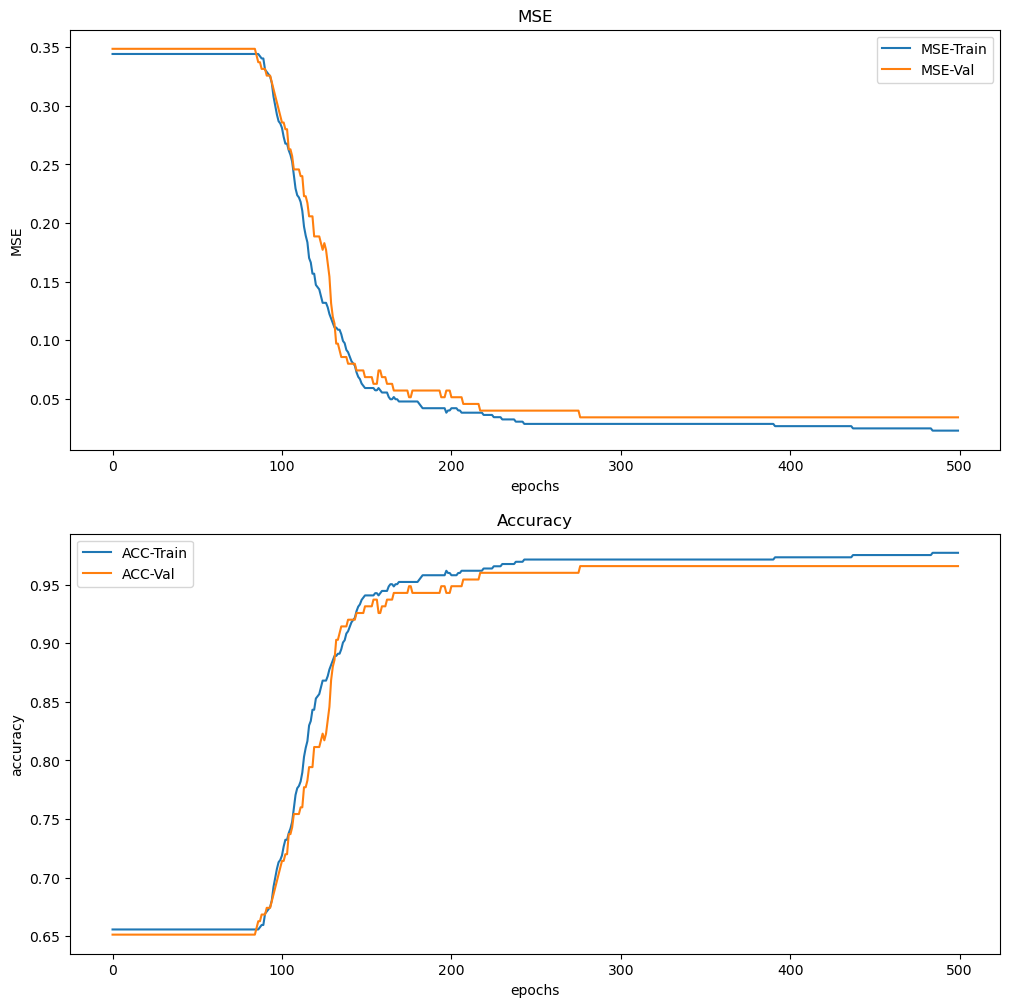

[CV 5/5] END C=0.01, gamma=scale, kernel=linear;, score=0.933 total time=   0.0s
[CV 5/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.924 total time=   0.0s
[CV 2/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.981 total time=   0.0s
[CV 4/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.971 total time=   0.0s
[CV 5/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.933 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=auto, kernel=rbf;, score=0.657 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.981 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.981 total time=   0.0s
[CV 4/5] END .....C=0.1, gam

[CV 2/5] END C=0.01, gamma=scale, kernel=linear;, score=0.981 total time=   0.0s
[CV 4/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.952 total time=   0.0s
[CV 3/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.933 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=auto, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=auto, kernel=rbf;, score=0.657 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=auto, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.952 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.952 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.981 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.952 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.943 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.981 total time=   0.0s
[CV 5/5] END ....C=1, gamma=

[CV 2/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.971 total time=   0.0s
[CV 2/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=linear;, score=0.981 total time=   0.0s
[CV 1/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.924 total time=   0.0s
[CV 5/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END C=0.01, coef0=0, degree=2, gamma=auto, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END C=0.01, coef0=0, degree=2, gamma=auto, kernel=rbf;, score=0.657 total time=   0.0s
[CV 3/5] END C=0.01, coef0=1, degree=2, gamma=scale, kernel=linear;, score=0.933 total time=   0.0s
[CV 4/5] END C=0.01, coef0=1, degree=2, gamma=scale, kernel=linear;, score=0.971 total time=   0.0s
[CV 1/5] END C=0.01, coef0=1, degree=2, gamma=scale, kernel=poly;, score=0.933 total time=   0.0s
[CV 2/5] END C=0.01, coef0=1, degree=2, gamma=scale, kernel=poly;, score=0.981 total time=   0.0s
[CV 2/5] END C=0.01, coef0=1, degree=

In [47]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title('MSE')
plt.plot(list_MseTrain, label='MSE-Train')
plt.plot(list_MseValid, label='MSE-Val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('MSE')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(list_AccTrain, label='ACC-Train')
plt.plot(list_AccValid, label='ACC-Val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()